<h3>Data representations for neural networks</h3>

In the MNIST example, we started from data stored in multidimensional NumPy arrays, called _tensors_. In general, all current machine-learning systems use tensors as their basic data structure. Tensors are so fundamental to the field that one of the libraries we'll be working with, TensorFlow, was named after them. So, what's a tensor?

At its core, a tensor is a container for (usually) numerical data. You're probably familiar with vectors, which are _rank-1_ tensors, and matrices, which are _rank-2_ tensors. In a nutshell, tensors are a generalization of matrices to an arbitrary number of dimensions (sometimes referred to as _axes_, not to be confused with the axes you're familiar with from, say, the Cartesian plane).

<h3>Scalars (rank-0 tensors)</h3>

A tensor that contains only one number is called a _scalar_, or _rank-0 tensor_, or _0D tensor_. You can display the number of axes of a NumPy tensor via the *ndim* attribute; a scalar tensor has 0 axes, so its ndim == 0. The number of axes of a tensor is also called its _rank_.

In [1]:
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)
print(x.shape)

12
0
()


<h3>Vectors (rank-1 tensors)</h3>

An array of numbers is called a _vector_, or _rank-1 tensor_, or _1D tensor_. A rank-1 tensor is said to have exactly one axis.

In [2]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print(x.ndim)
print(x.shape)

[12  3  6 14  7]
1
(5,)


This vector has five entries, so it is a _5-dimensional vector_ (a 3-dimensional vector can be thought of as the x, y, and z axes in 3D space, but this metaphor falls apart pretty quickly at higher dimensions). However, it is still only a 1D tensor. _Dimensionality_ can denote either the number of entries along a specific axis (as in this example, which has one axis and five dimensions), or the total number of axes in a tensor, which can be confusing. That's why it's preferable to talk about the _rank_ of a tensor, which is 1 in this case.

<h3>Matrices (rank-2 tensors)</h3>

An array of vectors is a _matrix_, or _rank-2 tensor_, or _2D tensor_. A matrix has two axes (often referred to as its _rows_ and _columns_). You can visualize a matrix as a rectangular grid of numbers. Here's a matrix in NumPy:

In [3]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
print(x.ndim)
print(x.shape)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
(3, 5)


The entries from the first axis are called the _rows_, and the entries from the second axis are called the _columns_. Each row and column is a vector. For example, the first row (and the first row vector) of the previous example is [5, 78, 2, 34, 0] and the first column (and the first column vector) is [5, 6, 7]. Notice that in Python, we specify the rows, and the columns are implied (taking the 1st entry in each row gives you the 1st column, but the matrix is defined in row-major order). Python matrices are actually stored as lists of lists, which is why you see the extra pair of square brackets around the outside -- that's defining the matrix, and then each row of the matrix is likewise defined inside its own pair of square brackets. The parentheses around all of it are because np.array is a _function_, and we're passing the definition of the matrix to that function as an _argument_. The function then creates the actual matrix in memory and gives it back to us as the object x.

<h3>Rank-3 and higher-rank tensors</h3>

If you pack matrices into a new array, you obtain a _rank-3 tensor_ (or _3D tensor_), which you could visually interpret as a cube of numbers (but alas, our computer screens are flat). By packing rank-3 tensors into yet another array, you could create a rank-4 tensor, and so on. (An example of a rank-3 tensor would be encoding a picture with red, blue, and green pixel colors). In deep learning projects we typically manipulate tensors with ranks between 0 and 4; rank-5 tensors typically involve processing video data. Here's a rank-3 tensor:

In [4]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)
print(x.shape)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3
(3, 3, 5)


<h3>Key attributes</h3>

A tensor is defined by three key attributes:
- Number of axes (rank) -- this is what we obtain by checking the ndim attribute in our examples. A rank-3 tensor has 3 axes, a matrix or rank-2 tensor has 2 axes.
- Shape -- this is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous rank-2 (matrix) tensor had shape (3, 5) because it has three rows and five columns; the rank-3 tensor example has shape (3, 3, 5) because it has three total elements, each of which is itself a matrix with 3 rows and 5 columns. A vector has a shape with a single element, such as (5, ) whereas a scalar has an empty shape.
- Data type (usally called _dtype_ in Python) -- This is the type of the data contained in the tensor: for instance, it could be _float16_, _float32_, _float64_, _uint8_, and so on. You will also come across _string_ tensors, which contain text data.

To make this more concrete, let's look back at the MNIST data set. First, we load it, which creates four tensors -- one containing the training set images, one containing the training set labels, one containing the test set images, and one containing the test set labels.

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let's check the number of axes, shape, and data type of the tensor train_images:

In [6]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


So what we have here is a rank-3 tensor consisting of 60,000 28x28 matrices, all of whose entries are 8-bit unsigned integers. Each matrix is a grayscale image, with coefficients between 0 and 255 (which is the range of a uint8 variable). We can examine any of these images using Matplotlib, a well-known Python data visualization library: 

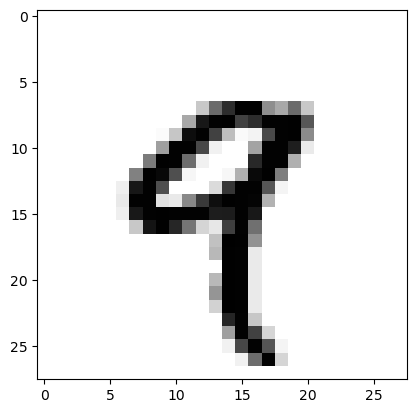

In [7]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Since our training data set is labeled, we can check to make sure that the corresponding label in the training data set is a 9:

In [8]:
print(train_labels[4])

9


Looking at digits from our data set is probably something we'll want to do a lot. We can take the previous code and turn it into a Python function. (We'll also turn off the axes.)

In [9]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

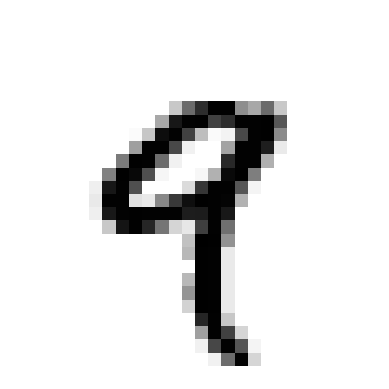

In [10]:
plot_digit(train_images[4])

We can make the images smaller, and plot a bunch of them at the same time, like this:

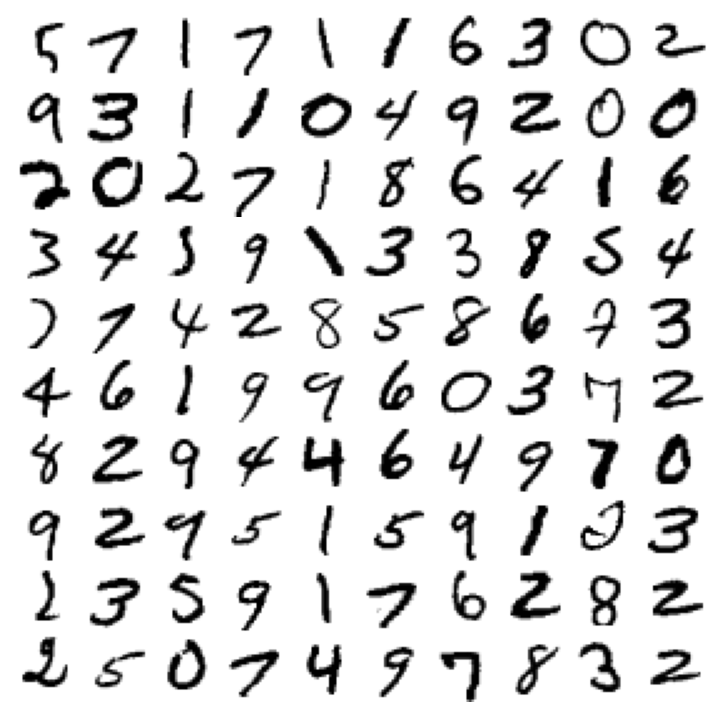

In [11]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(train_images[100:200]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)

In [12]:
for i in range(10):
    s = ""
    for j in range(10):
        s = s + str(train_labels[100+(i*10)+j]) + " "
    print(s)

5 7 1 7 1 1 6 3 0 2 
9 3 1 1 0 4 9 2 0 0 
2 0 2 7 1 8 6 4 1 6 
3 4 5 9 1 3 3 8 5 4 
7 7 4 2 8 5 8 6 7 3 
4 6 1 9 9 6 0 3 7 2 
8 2 9 4 4 6 4 9 7 0 
9 2 9 5 1 5 9 1 2 3 
2 3 5 9 1 7 6 2 8 2 
2 5 0 7 4 9 7 8 3 2 


In [13]:
s = ""
for idx, label in enumerate(train_labels[100:200]):
    s = s + str(label) + " "
    if idx % 10 == 9:
        print(s)
        s = ""

5 7 1 7 1 1 6 3 0 2 
9 3 1 1 0 4 9 2 0 0 
2 0 2 7 1 8 6 4 1 6 
3 4 5 9 1 3 3 8 5 4 
7 7 4 2 8 5 8 6 7 3 
4 6 1 9 9 6 0 3 7 2 
8 2 9 4 4 6 4 9 7 0 
9 2 9 5 1 5 9 1 2 3 
2 3 5 9 1 7 6 2 8 2 
2 5 0 7 4 9 7 8 3 2 
